In [0]:
import tensorflow.keras as keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

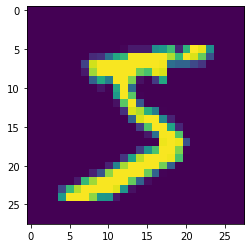

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
#plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2638 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9764


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9676
0.1064363643527031
0.9675999879837036


In [0]:
# if reshaped earlier
"""

(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

"""

In [0]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')


predictions = new_model.predict(x_test)
print(predictions)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets
[[2.5798263e-07 6.1902242e-08 3.6818992e-06 ... 9.9996018e-01
  1.0433478e-08 1.6409119e-07]
 [1.0435363e-09 8.5237180e-06 9.9999058e-01 ... 1.4159390e-09
  7.0802217e-09 3.3033763e-14]
 [2.8171573e-07 9.9965835e-01 2.5482836e-05 ... 1.7817198e-04
  8.5688313e-05 2.2638710e-06]
 ...
 [9.4277652e-08 2.3130797e-05 6.1321785e-08 ... 1.0084644e-04
  5.5280871e-06 4.8140311e-05]
 [2.8936129e-05 7.1352275e-07 4.5308136e-07 ... 2.1808564e-05
  2.2289001e-03 4.9473435e-08]
 [1.1176216e-05 6.9918222e-08 4.9709024e-06 ... 4.5483051e-11
  1.6549902e-07 1.7302014e-08]]


7


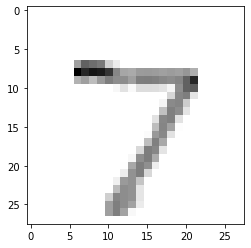

In [0]:
import numpy as np
print(np.argmax(predictions[0]))


plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()